# Geração de Dados Sintéticos

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Classes elípticas e/ou esféricas

In [ ]:
def gerar_configuracao(mu_list, sigma_list, tamanhos, config_id):
    dfs = []
    for i, (mu, sigma2, n) in enumerate(zip(mu_list, sigma_list, tamanhos)):
        Sigma = np.diag(sigma2)
        data = np.random.multivariate_normal(mu, Sigma, n)
        df = pd.DataFrame(data, columns=["x1", "x2"])
        df["class"] = i + 1
        dfs.append(df)
    df_config = pd.concat(dfs, ignore_index=True)
    df_config["config"] = config_id
    return df_config

np.random.seed(42)  # reprodutibilidade

# Configuração 1
mu_1 = [[5, 0], [15, 5], [18, 14]]
sigma2_1 = [[81, 9], [9, 100], [25, 36]]
n1 = [200, 100, 50]
df1 = gerar_configuracao(mu_1, sigma2_1, n1, config_id=1)
l1 = "Classes elípticas de tamanhos diferentes"

# Configuração 2
mu_2 = [[0, 0], [30, 0], [12, 25]]
sigma2_2 = [[100, 100], [49, 49], [16, 16]]
n2 = [200, 100, 50]
df2 = gerar_configuracao(mu_2, sigma2_2, n2, config_id=2)
l2 = "Classes esféricas de tamanhos diferentes"

# Configuração 3
mu_3 = [[0, 0], [15, 5], [15, -5]]
sigma2_3 = [[100, 4], [100, 4], [100, 4]]
n3 = [100, 100, 100]
df3 = gerar_configuracao(mu_3, sigma2_3, n3, config_id=3)
l3 = "Classes elípticas de tamanhos iguais"

# Configuração 4
mu_4 = [[0, 0], [15, 0], [-15, 0]]
sigma2_4 = [[16, 16], [16, 16], [16, 16]]
n4 = [100, 100, 100]
df4 = gerar_configuracao(mu_4, sigma2_4, n4, config_id=4)
l4 = "Classes esféricas de tamanhos iguais"

# Configuração 5
mu_5 = [[5, 0], [15, 5], [10, -7], [3, 15]]
sigma2_5 = [[81, 9], [9, 100], [49, 16], [25, 25]]
n5 = [50, 50, 50, 50]
df5 = gerar_configuracao(mu_5, sigma2_5, n5, config_id=5)
l5 = "3 classes elípticas e 1 esférica"

# Configuração 6
mu_6 = [[5, 0], [15, 5], [12, -12], [7, 17]]
sigma2_6 = [[81, 9], [9, 100], [16, 16], [25, 25]]
n6 = [50, 50, 50, 50]
df6 = gerar_configuracao(mu_6, sigma2_6, n6, config_id=6)
l6 = "2 classes elípticas e 2 esféricas"

# Configuração 7
mu_7 = [[0, 0], [18, 0], [-18, 0], [0, -12]]
sigma2_7 = [[12, 12], [20, 20], [16, 16], [81, 20]]
n7 = [50, 50, 50, 50]
df7 = gerar_configuracao(mu_7, sigma2_7, n7, config_id=7)
l7 = "1 classe elíptica e 3 esféricas"

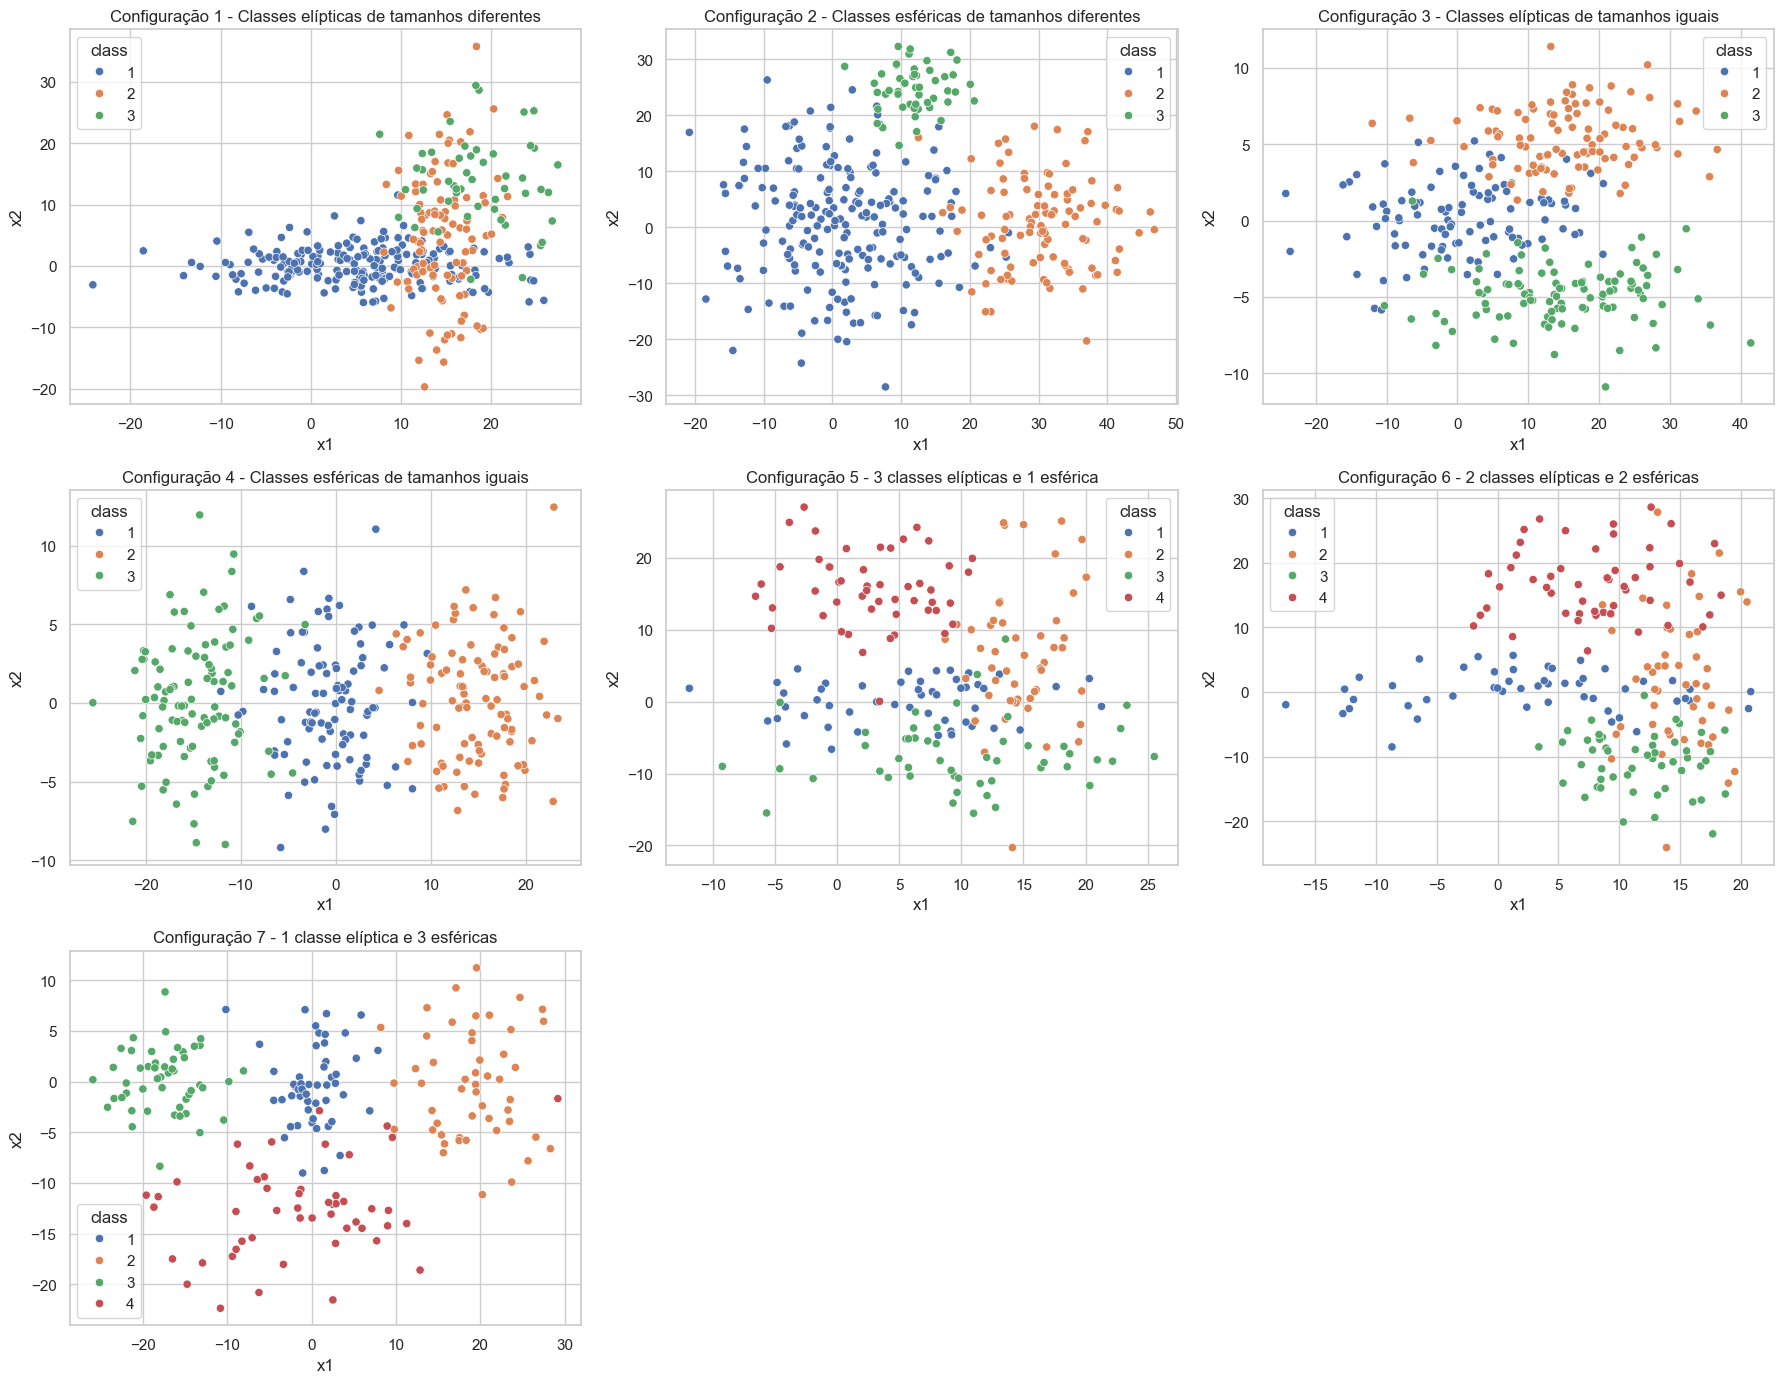

In [43]:
def plot_configuracoes_todas(dfs, labels):
    fig, axs = plt.subplots(3, 3, figsize=(18, 14))
    
    for idx, (df, label) in enumerate(zip(dfs, labels)):
        row, col = divmod(idx, 3)
        ax = axs[row][col]
        sns.scatterplot(data=df, x="x1", y="x2", hue="class", palette="deep", ax=ax)
        ax.set_title(f"Configuração {df['config'].iloc[0]} - {label}")
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
    
    # remove os plots vazios (posição 7 e 8)
    axs[2][1].axis("off")
    axs[2][2].axis("off")
    
    plt.tight_layout()
    plt.show()

plot_configuracoes_todas(
    dfs=[df1, df2, df3, df4, df5, df6, df7],
    labels=[l1, l2, l3, l4, l5, l6, l7]
)

## Classes com ruído

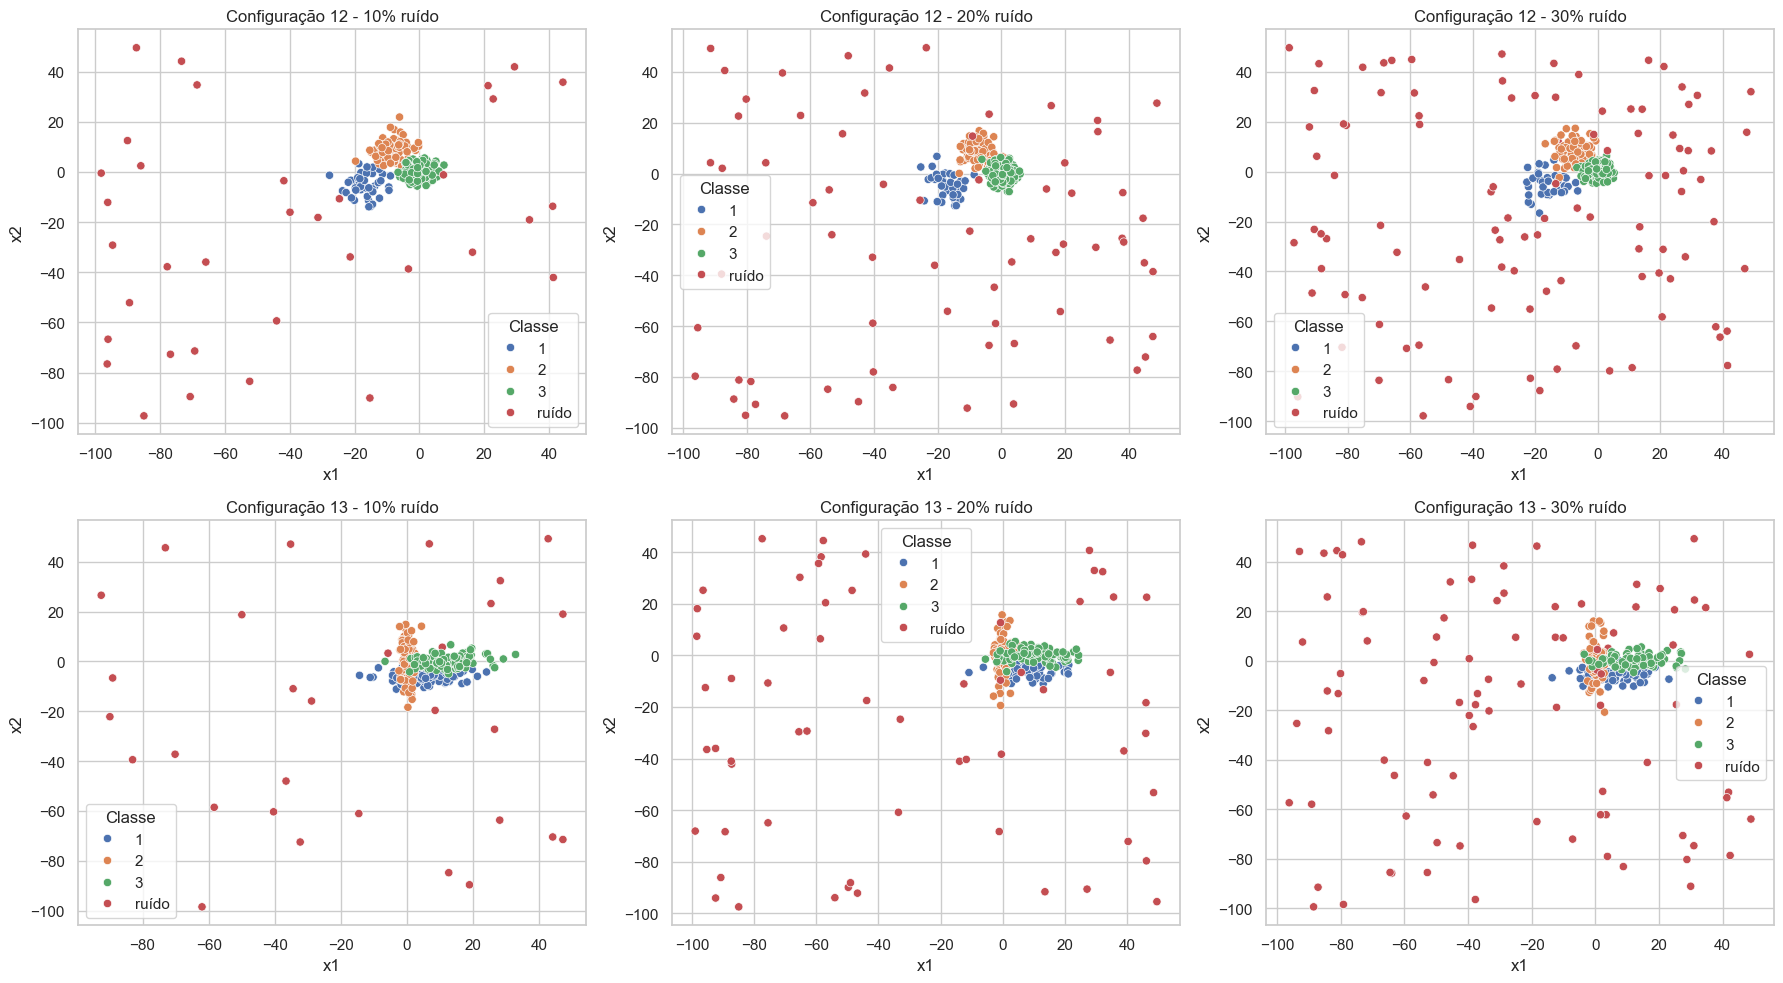

In [44]:
params_config_12 = [
    {'mu': [-16, -5], 'sigma': [20, 20], 'n': 50},
    {'mu': [-8, 8], 'sigma': [13, 13], 'n': 100},
    {'mu': [0, 0], 'sigma': [6, 6], 'n': 200},
]

params_config_13 = [
    {'mu': [7, -6], 'sigma': [50, 5], 'n': 100},
    {'mu': [0, 0], 'sigma': [2, 50], 'n': 100},
    {'mu': [12, 0], 'sigma': [50, 5], 'n': 100},
]

noise_range = [-100, 50]
np.random.seed(42)

def generate_data(config_params, noise_percent):
    data_all = []
    for class_idx, param in enumerate(config_params, start=1):
        mu = np.array(param['mu'])
        sigma_diag = np.diag(param['sigma'])
        n = param['n']
        n_noise = int(n * noise_percent / 100)
        n_signal = n - n_noise

        real_data = np.random.multivariate_normal(mu, sigma_diag, n_signal)
        labels_real = np.full((n_signal,), class_idx)

        noise_data = np.random.uniform(noise_range[0], noise_range[1], size=(n_noise, 2))
        labels_noise = np.full((n_noise,), 0)

        data = np.vstack([real_data, noise_data])
        labels = np.concatenate([labels_real, labels_noise])

        df = pd.DataFrame(data, columns=['x1', 'x2'])
        df['class'] = labels
        data_all.append(df)

    return pd.concat(data_all, ignore_index=True)

configs = [
    (params_config_12, 10),
    (params_config_12, 20),
    (params_config_12, 30),
    (params_config_13, 10),
    (params_config_13, 20),
    (params_config_13, 30),
]

titles = [
    "Configuração 12 - 10% ruído",
    "Configuração 12 - 20% ruído",
    "Configuração 12 - 30% ruído",
    "Configuração 13 - 10% ruído",
    "Configuração 13 - 20% ruído",
    "Configuração 13 - 30% ruído",
]

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i, ((params, noise), title) in enumerate(zip(configs, titles)):
    df = generate_data(params, noise)
    df['classe_legenda'] = df['class'].replace(0, 'ruído')

    ax = axs[i // 3, i % 3]
    sns.scatterplot(data=df, x='x1', y='x2', hue='classe_legenda', palette='deep', hue_order=[1, 2, 3, 'ruído'], ax=ax)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend(title="Classe", loc='best')

plt.tight_layout()
plt.show()

## Classes com outliers

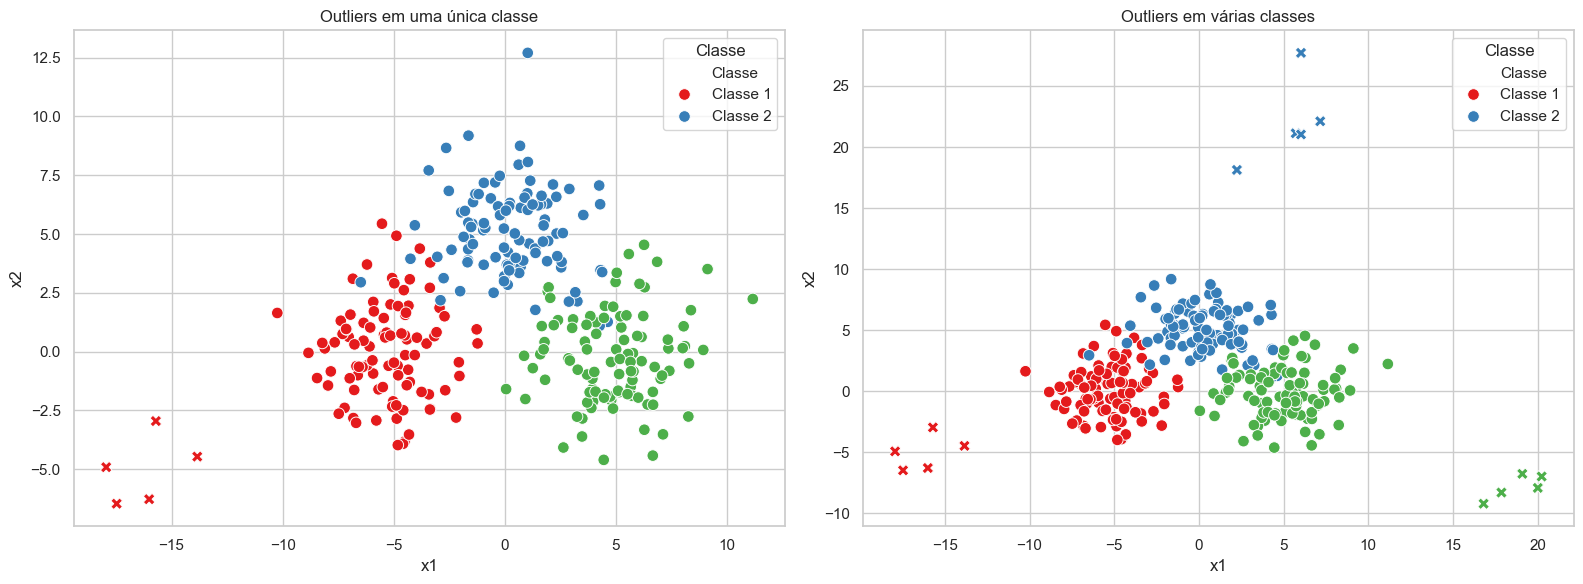

In [ ]:
def gerar_dados_uma_classe_outlier():
    np.random.seed(42)
    n = 100
    frac_outlier = 0.05

    classe1 = np.random.normal(loc=[-5, 0], scale=2, size=(n, 2))
    classe2 = np.random.normal(loc=[0, 5], scale=2, size=(n, 2))
    classe3 = np.random.normal(loc=[5, 0], scale=2, size=(n, 2))

    dados, rotulos, outlier_flags = [], [], []

    deslocamento = np.array([-12, -6])
    n_outliers = int(n * frac_outlier)

    for i, ponto in enumerate(classe1):
        if i < n_outliers:
            dados.append(ponto + deslocamento)
            outlier_flags.append(1)
        else:
            dados.append(ponto)
            outlier_flags.append(0)
        rotulos.append('Classe 1')

    dados.extend(classe2)
    rotulos.extend(['Classe 2'] * n)
    outlier_flags.extend([0] * n)

    dados.extend(classe3)
    rotulos.extend(['Classe 3'] * n)
    outlier_flags.extend([0] * n)

    df = pd.DataFrame(dados, columns=["x1", "x2"])
    df["Classe"] = rotulos
    df["Outlier"] = outlier_flags
    return df

def gerar_dados_varias_classes_outlier():
    np.random.seed(42)
    n = 100
    frac_outlier = 0.05

    classe1 = np.random.normal(loc=[-5, 0], scale=2, size=(n, 2))
    classe2 = np.random.normal(loc=[0, 5], scale=2, size=(n, 2))
    classe3 = np.random.normal(loc=[5, 0], scale=2, size=(n, 2))

    deslocamentos = {
        'Classe 1': np.array([-12, -6]),
        'Classe 2': np.array([5, 15]),
        'Classe 3': np.array([15, -8])
    }

    dados, rotulos, outlier_flags = [], [], []

    def adicionar_classe(classe_data, nome_classe, deslocamento):
        n_outliers = int(len(classe_data) * frac_outlier)
        for i, ponto in enumerate(classe_data):
            if i < n_outliers:
                dados.append(ponto + deslocamento)
                outlier_flags.append(1)
            else:
                dados.append(ponto)
                outlier_flags.append(0)
            rotulos.append(nome_classe)

    adicionar_classe(classe1, 'Classe 1', deslocamentos['Classe 1'])
    adicionar_classe(classe2, 'Classe 2', deslocamentos['Classe 2'])
    adicionar_classe(classe3, 'Classe 3', deslocamentos['Classe 3'])

    df = pd.DataFrame(dados, columns=["x1", "x2"])
    df["Classe"] = rotulos
    df["Outlier"] = outlier_flags
    return df

df_uma_classe = gerar_dados_uma_classe_outlier()
df_varias_classes = gerar_dados_varias_classes_outlier()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# plot 1
plot1 = sns.scatterplot(data=df_uma_classe, x='x1', y='x2', hue='Classe', style='Outlier', ax=axs[0], palette='Set1', s=70)
axs[0].set_title("Outliers em uma única classe")

# deixa apenas a legenda das classes
handles1, labels1 = axs[0].get_legend_handles_labels()
handles1 = handles1[:3]
labels1 = labels1[:3]
axs[0].legend(handles1, labels1, title="Classe")

# plot 2
plot2 = sns.scatterplot(data=df_varias_classes, x='x1', y='x2', hue='Classe', style='Outlier', ax=axs[1], palette='Set1', s=70)
axs[1].set_title("Outliers em várias classes")

# deixa apenas a legenda das classes
handles2, labels2 = axs[1].get_legend_handles_labels()
handles2 = handles2[:3]
labels2 = labels2[:3]
axs[1].legend(handles2, labels2, title="Classe")

plt.tight_layout()
plt.show()